# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**a series is reporter data, b series is partner data**

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '392' # Japan
# Period
period = '2019' # Annual

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, period + '12', 'HS', 'M')
print(status)
status = tta.data_available(partner, period + '12', 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '392', 'rDesc': 'Japan', 'ps': '201912', 'TotalRecords': 165846, 'isOriginal': 1, 'publicationDate': '2020-02-05T00:00:00', 'isPartnerDetail': 1}]


# CTH2

In [4]:
cc = 'AG2'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df2 = tta.prepare(data)

{'r': '699', 'p': '392', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}
{'r': '392', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


In [5]:
df2['QR'] = df2['quantity_a'] / df2['quantity_b']
df2['VR'] = df2['value_a'] / df2['value_b']
df2.sort_values(by=['code'])

code                                               desc  quantity_a  \
01   01                                      Animals; live           0   
03   03  Fish and crustaceans, molluscs and other aquat...           0   
04   04  Dairy produce; birds' eggs; natural honey; edi...           0   
05   05  Animal originated products; not elsewhere spec...           0   
06   06  Trees and other plants, live; bulbs, roots and...           0   
07   07    Vegetables and certain roots and tubers; edible           0   
08   08  Fruit and nuts, edible; peel of citrus fruit o...           0   
09   09                       Coffee, tea, mate and spices           0   
10   10                                            Cereals           0   
11   11  Products of the milling industry; malt, starch...           0   
12   12  Oil seeds and oleaginous fruits; miscellaneous...           0   
13   13  Lac; gums, resins and other vegetable saps and...           0   
14   14  Vegetable plaiting materials; vegetable produc...           0   
15   15  Animal or vegetable fats and oils and their cl...           0   
16   16  Meat, fish or crustaceans, molluscs or other a...           0   
17   17                     Sugars and sugar confectionery           0   
18   18                       Cocoa and cocoa preparations           0   
19   19  Preparations of cereals, flour, starch or milk...           0   
20   20  Preparations of vegetables, fruit, nuts or oth...           0   
21   21                  Miscellaneous edible preparations           0   
22   22                     Beverages, spirits and vinegar           0   
23   23  Food industries, residues and wastes thereof; ...           0   
24   24       Tobacco and manufactured tobacco substitutes           0   
25   25  Salt; sulphur; earths, stone; plastering mater...           0   
26   26                                 Ores, slag and ash           0   
27   27  Mineral fuels, mineral oils and products of th...           0   
28   28  Inorganic chemicals; organic and inorganic com...           0   
29   29                                  Organic chemicals           0   
30   30                            Pharmaceutical products           0   
31   31                                        Fertilizers           0   
32   32  Tanning or dyeing extracts; tannins and their ...           0   
33   33  Essential oils and resinoids; perfumery, cosme...           0   
34   34  Soap, organic surface-active agents; washing, ...           0   
35   35  Albuminoidal substances; modified starches; gl...           0   
36   36  Explosives; pyrotechnic products; matches; pyr...           0   
37   37              Photographic or cinematographic goods           0   
38   38                           Chemical products n.e.c.           0   
39   39                      Plastics and articles thereof           0   
40   40                        Rubber and articles thereof           0   
41   41  Raw hides and skins (other than furskins) and ...           0   
42   42  Articles of leather; saddlery and harness; tra...           0   
43   43  Furskins and artificial fur; manufactures thereof           0   
44   44           Wood and articles of wood; wood charcoal           0   
45   45                          Cork and articles of cork           0   
46   46  Manufactures of straw, esparto or other plaiti...           0   
48   48  Paper and paperboard; articles of paper pulp, ...           0   
49   49  Printed books, newspapers, pictures and other ...           0   
50   50                                               Silk           0   
51   51  Wool, fine or coarse animal hair; horsehair ya...           0   
52   52                                             Cotton           0   
53   53  Vegetable textile fibres; paper yarn and woven...           0   
54   54  Man-made filaments; strip and the like of man-...           0   
55   55                             Man-made staple fibres           0   
56   56

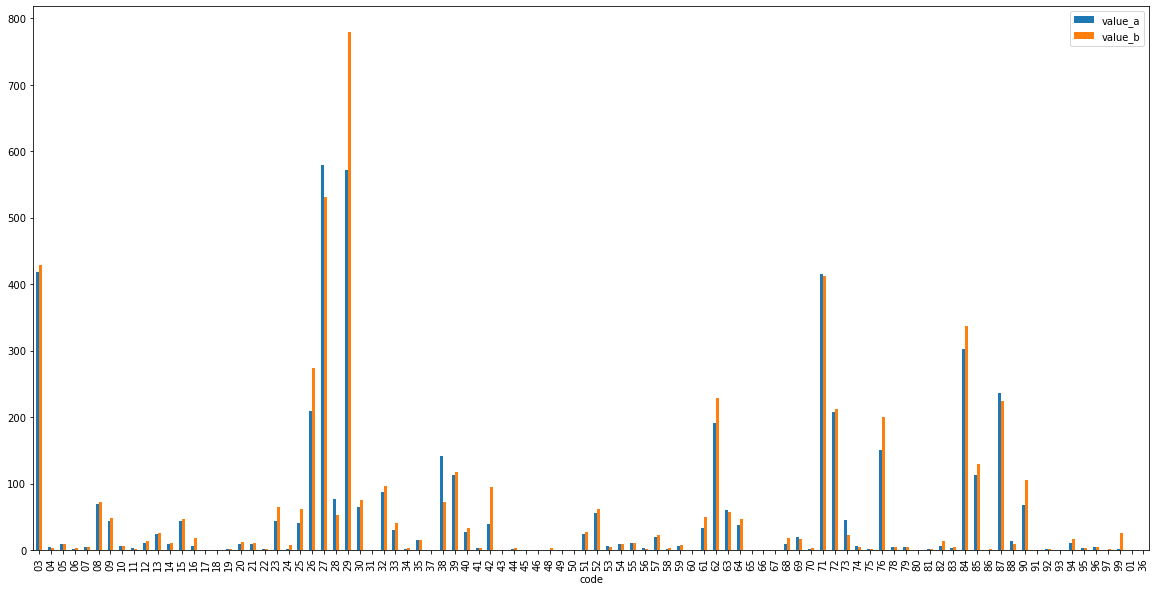

In [6]:
df2.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [7]:
df2.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH4

In [8]:
cc = 'AG4'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df4 = tta.prepare(data)

{'r': '699', 'p': '392', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': '392', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


In [9]:
df4['QR'] = df4['quantity_a'] / df4['quantity_b']
df4['VR'] = df4['value_a'] / df4['value_b']
df4.sort_values(by=['code'])

code                                               desc  quantity_a  \
0106  0106                Animals; live, n.e.c. in chapter 01           0   
0301  0301                                         Fish; live        5313   
0302  0302  Fish; fresh or chilled, excluding fish fillets...        5176   
0303  0303  Fish; frozen, excluding fish fillets and other...       54947   
0304  0304  Fish fillets and other fish meat (whether or n...    37857400   
0305  0305  Fish, dried, salted or in brine; smoked fish, ...       11880   
0306  0306  Crustaceans; in shell or not, live, fresh, chi...    39720521   
0307  0307  Molluscs; whether in shell or not, live, fresh...     1532928   
0405  0405  Butter and other fats and oils derived from mi...       26458   
0406  0406                                    Cheese and curd       38250   
0408  0408  Birds' eggs, not in shell; egg yolks, fresh, d...      831786   
0409  0409                                     Honey; natural       85795   
0502  0502  Pigs', hogs' or boars' bristles and hair; and ...         230   
0505  0505  Skins and other parts of birds with feathers, ...          10   
0506  0506  Bones and horn-cores, unworked, defatted, simp...     2833018   
0507  0507  Ivory, tortoise-shell, whalebone and whalebone...      498151   
0508  0508  Coral and similar materials, unworked or simpl...        9143   
0511  0511  Animal products not elsewhere specified or inc...       24000   
0601  0601  Bulbs, tubers, tuberous roots, corms, crowns a...       29017   
0602  0602  Plants, live; n.e.c. in heading no. 0601, (inc...       60957   
0603  0603  Flowers; cut flowers and flower buds of a kind...      152836   
0604  0604  Foliage, branches and other parts of plants, w...       59577   
0701  0701                         Potatoes; fresh or chilled       36900   
0703  0703  Onions, shallots, garlic, leeks and other alli...       16858   
0704  0704  Cabbages, cauliflowers, kohlrabi, kale and sim...      175632   
0706  0706  Carrots, turnips, salad beetroot, salsify, cel...        7677   
0707  0707           Cucumbers and gherkins; fresh or chilled          17   
0708  0708  Leguminous vegetables; shelled or unshelled, f...         160   
0709  0709  Vegetables; n.e.c. in chapter 07, fresh or chi...       58599   
0710  0710  Vegetables (uncooked or cooked by steaming or ...      965870   
0711  0711  Vegetables provisionally preserved; (e.g. by s...     1576589   
0712  0712  Vegetables, dried; whole, cut, sliced, broken ...      710015   
0713  0713  Vegetables, leguminous; shelled, whether or no...      746830   
0714  0714  Manioc, arrowroot, salep, Jerusalem artichokes...        1530   
0801  0801  Nuts, edible; coconuts, Brazil nuts and cashew...     7828051   
0802  0802  Nuts (excluding coconuts, Brazils and cashew n...        1090   
0803  0803       Bananas, including plantains; fresh or dried        3876   
0804  0804  Dates, figs, pineapples, avocados, guavas, man...      650391   
0805  0805                       Citrus fruit; fresh or dried         705   
0806  0806                             Grapes; fresh or dried        2790   
0808  0808                   Apples, pears and quinces; fresh         300   
0810  0810                 Fruit, fresh; n.e.c. in chapter 08        2373   
0811  0811  Fruit and nuts; uncooked or cooked by steaming...      128013   
0812  0812  Fruit and nuts provisionally preserved; e.g. b...       17295   
0813  0813  Fruit, dried, other than that of heading no. 0...        1809   
0814  0814  Peel of citrus fruit or melons (including wate...           0   
0901  0901  Coffee, whether or not roasted or decaffeinate...      220770   
0902  0902                                                Tea     4749129   
0904  0904  Pepper of the genus piper; dried or crushed or...      831848   
0906  0906                 Cinnamon and cinnamon-tree flowers       18569   
0907  0907             Cloves (whole fruit, cloves and stems)        7600   
09

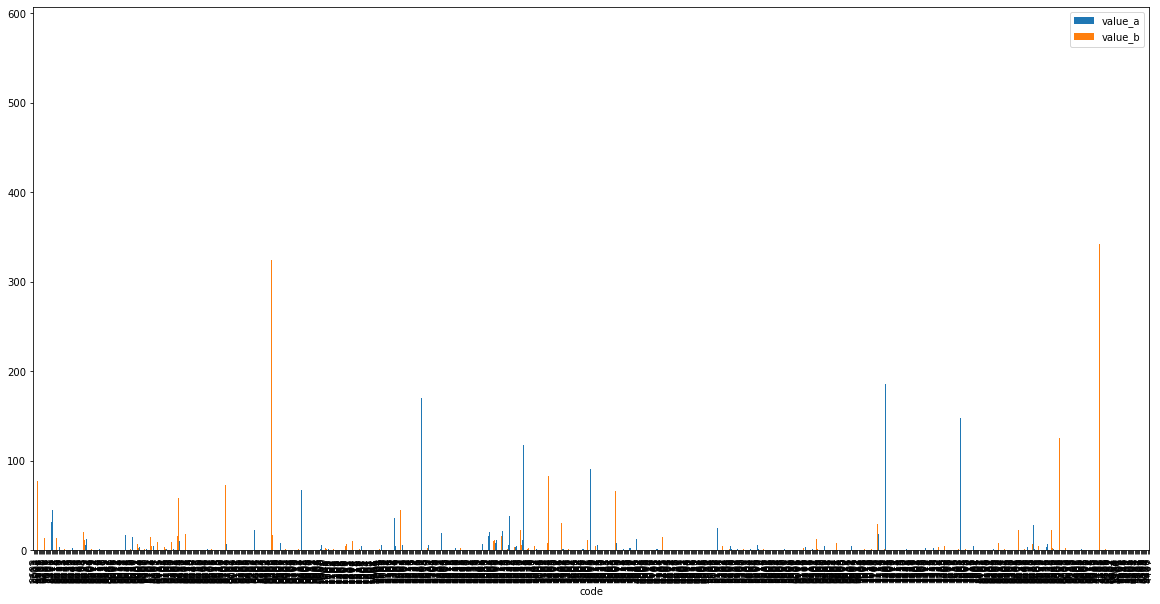

In [10]:
df4.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [11]:
df4.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH6

In [12]:
cc = 'AG6'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df6 = tta.prepare(data)

{'r': '699', 'p': '392', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}
{'r': '392', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}


In [13]:
df6['QR'] = df6['quantity_a'] / df6['quantity_b']
df6['VR'] = df6['value_a'] / df6['value_b']
df6.sort_values(by=['code'])

code                                               desc  quantity_a  \
010620  010620      Reptiles; live (including snakes and turtles)           0   
030111  030111                 Fish; live, ornamental, freshwater         414   
030119  030119      Fish; live, ornamental, other than freshwater        4899   
030219  030219  Fish; fresh or chilled, salmonidae, n.e.c. in ...         820   
030232  030232  Fish; fresh or chilled, yellowfin tunas (Thunn...        3730   
030239  030239  Fish; fresh or chilled, tuna, n.e.c. in item n...         595   
030289  030289  Fish; fresh or chilled, n.e.c. in heading 0302...          31   
030326  030326  Fish; frozen, eels (Anguilla spp.), excluding ...       14500   
030342  030342  Fish; frozen, yellowfin tunas (Thunnus albacar...       40346   
030343  030343  Fish; frozen, skipjack or stripe-bellied bonit...           1   
030389  030389  Fish; frozen, n.e.c. in heading 0303, excludin...         100   
030399  030399  Fish; frozen, fish fins (other than shark fins...           0   
030449  030449  Fish fillets; fresh or chilled, other than fis...        1210   
030459  030459  Fish meat; excluding fillets, whether or not m...        9000   
030487  030487  Fish fillets; frozen, tunas (of the genus Thun...           0   
030489  030489  Fish fillets; frozen, of fish n.e.c. in headin...       20960   
030497  030497  Fish meat, excluding fillets, whether or not m...       27080   
030499  030499  Fish meat, excluding fillets, whether or not m...    37799150   
030510  030510  Fish; flours, meals and pellets, fit for human...       11880   
030611  030611  Crustaceans; frozen, rock lobsters and other s...       11100   
030612  030612  Crustaceans; frozen, lobsters (Homarus spp.), ...        6510   
030616  030616  Crustaceans; frozen, cold-water shrimps and pr...       15084   
030617  030617  Crustaceans; frozen, shrimps and prawns, exclu...    39687782   
030636  030636  Crustaceans; live, fresh or chilled, shrimps a...          40   
030695  030695  Crustaceans; shrimps and prawns, smoked, cooke...           5   
030739  030739  Molluscs; mussels (Mytilus spp., Perna spp.), ...      465200   
030743  030743  Molluscs; cuttle fish and squid, whether in sh...      645344   
030749  030749  Molluscs; cuttle fish and squid, whether in sh...      141728   
030752  030752           Molluscs; octopus (Octopus spp.), frozen      194496   
030759  030759  Molluscs; octopus (Octopus spp.), dried, salte...       63000   
030779  030779  Molluscs; clams, cockle, ark shells (families ...       23160   
030792  030792  Molluscs; n.e.c. in heading 0307, whether in s...           0   
040510  040510           Dairy produce; derived from milk, butter        1000   
040590  040590  Dairy produce; fats and oils derived from milk...       25458   
040610  040610  Dairy produce; fresh cheese (including whey ch...           0   
040690  040690  Dairy produce; cheese (not grated, powdered or...       38250   
040811  040811  Eggs; birds' eggs, yolks, dried, whether or no...      749275   
040819  040819  Eggs; birds' eggs, yolks, fresh, cooked by ste...          33   
040891  040891  Eggs; birds' eggs (not in shell, excluding yol...       82478   
040900  040900                                     Honey; natural       85795   
050210  050210  Animal products; hair and bristles, of pigs, h...         230   
050590  050590  Animal products; skins and other parts of bird...          10   
050610  050610  Animal products; ossein and bones treated with...     2833018   
050690  050690  Animal products; bones and horn-cores and powd...           0   
050790  050790  Animal products; tortoise-shell, whalebone and...      498151   
050800  050800  Animal products; coral and similar materials, ...        9143   
051191  051191  Animal products; of fish or crustaceans, mollu...       24000   
051199  051199               Animal products; n.e.c. in chapter 5           0   
060110  060110  Plants, live; bulbs, tube

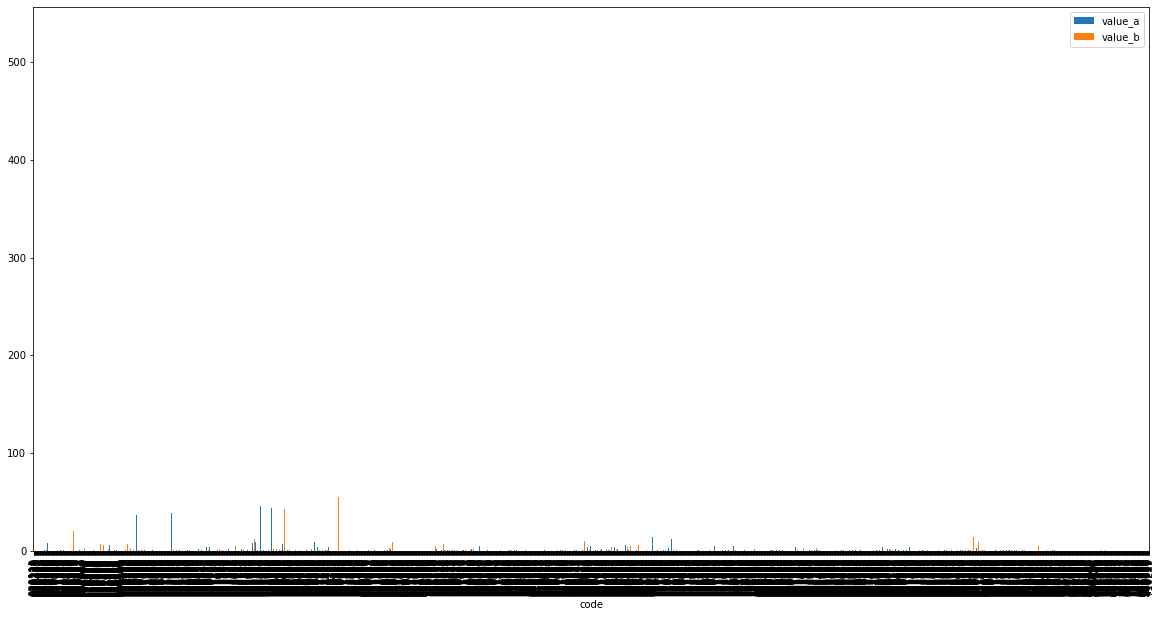

In [14]:
df6.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [15]:
df6.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Aggregation

In [16]:
df = df6
df['CTH6'] = df['code']
df['CTH4'] = df['code'].str.slice(0,4)
df['CTH2'] = df['code'].str.slice(0,2)
df['QR'] = df['quantity_a'] / df['quantity_b']
df['VR'] = df['value_a'] / df['value_b']
df.groupby(['CTH2']).sum()

quantity_a  value_a  quantity_b  value_b  value_diff  quantity_diff  \
CTH2                                                                        
01             0     0.00          38     0.00        0.00            -38   
03      79188165   419.05    80182775   428.98       -9.93        -994610   
04        982289     5.15      705651     3.83        1.32         276638   
05       3364552     8.50     3211293     8.39        0.11         153259   
06        302387     2.14      228089     2.97       -0.83          74298   
07       4296677     4.67     3433687     4.39        0.28         862990   
08       8636692    68.99     8028009    72.43       -3.44         608683   
09      13751435    44.13    12389712    48.87       -4.74        1361723   
10      11326061     5.45      982832     5.83       -0.38       10343229   
11       5011524     2.51     4400944     2.25        0.26         610580   
12       2558082    10.09     4960502    13.53       -3.44       -2402420   
13       2928256    24.26     3170544    25.33       -1.07        -242288   
14      12405229     8.37    16902736    10.87       -2.50       -4497507   
15      25106704    43.87    25616291    47.22       -3.35        -509587   
16       1504794     6.33     1690368    18.60      -12.27        -185574   
17         52836     0.09       62660     0.17       -0.08          -9824   
18          2660     0.02       10315     0.12       -0.10          -7655   
19        597553     1.03      589736     1.00        0.03           7817   
20       6021398     9.22     8039910    12.23       -3.01       -2018512   
21       1277142     9.25     1337884    11.31       -2.06         -60742   
22        463834     0.96      935459     1.63       -0.67        -471625   
23      99728784    43.57   120510845    64.38      -20.81      -20782061   
24        250413     0.97     1669864     7.99       -7.02       -1419451   
25    1338801120    40.75    19150336    62.24      -21.49     1319650784   
26    1980308775   209.46   132493958   274.20      -64.74     1847814817   
27    1105074436   579.13   972803782   531.67       47.46      132270654   
28      60327108    76.77    28784154    53.46       23.31       31542954   
29      62517807   572.01    64806242   778.81     -206.80       -2288435   
30        365327    64.18      461691    75.35      -11.17         -96364   
31        301110     0.09         298     0.10       -0.01         300812   
32      13695075    87.88    12939613    96.19       -8.31         755462   
33       1663021    30.82     2118528    40.25       -9.43        -455507   
34        369144     1.57      823381     2.69       -1.12        -454237   
35       2143680    15.09     1899653    14.52        0.57         244027   
36             0     0.00         213     0.01       -0.01           -213   
37          1238     0.03           3     0.00        0.03           1235   
38      25011062   141.77    23609972    72.26       69.51        1401090   
39      69939926   112.98    72853079   117.85       -4.87       -2913153   
40       6806910    26.48     8141478    32.44       -5.96       -1334568   
41        124315     3.30      142989     3.37       -0.07         -18674   
42        342906    39.32     2482716    94.12      -54.80       -2139810   
43          1537     0.05        7190     0.74       -0.69          -5653   
44        584398     1.62    12214672     2.96       -1.34      -11630274   
45             0     0.00           0     0.00        0.00              0   
46         18652     0.13       14802     0.32       -0.19           3850   
48        239881     0.81      178064     3.42       -2.61          61817   
49         18550     0.45       30089     0.50       -0.05         -11539   
50         15789     0.75       18907     0.78       -0.03          -3118   
51       1148482    24.84     1196547    27.16       -2.32         -48065   
52      10441215    55.92    11515262    61.72       -5.80       -1074047   
53

# Summary

In [17]:
print("Total Export, as per reporter data:", df['value_a'].sum(), " million USD.")
print("Total Import, as per partner data:", df['value_b'].sum(), " million USD.")

Total Export, as per reporter data: 4815.01  million USD.
Total Import, as per partner data: 5364.710000000001  million USD.


# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [18]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 1 # value to filter

dfi = df2 # Change to required data_frame
dfi = dfi[(dfi['value_pct_abs'] > percentage_cutoff) & (dfi['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'], ascending=False)

code                                               desc  quantity_a  \
29   29                                  Organic chemicals           0   
38   38                           Chemical products n.e.c.           0   
26   26                                 Ores, slag and ash           0   
42   42  Articles of leather; saddlery and harness; tra...           0   
76   76                     Aluminium and articles thereof           0   
62   62  Apparel and clothing accessories; not knitted ...           0   
90   90  Optical, photographic, cinematographic, measur...           0   
84   84  Nuclear reactors, boilers, machinery and mecha...           0   
73   73                             Iron or steel articles           0   
28   28  Inorganic chemicals; organic and inorganic com...           0   
99   99        Commodities not specified according to kind           0   
25   25  Salt; sulphur; earths, stone; plastering mater...           0   
23   23  Food industries, residues and wastes thereof; ...           0   
85   85  Electrical machinery and equipment and parts t...           0   
61   61  Apparel and clothing accessories; knitted or c...           0   
16   16  Meat, fish or crustaceans, molluscs or other a...           0   
30   30                            Pharmaceutical products           0   
64   64  Footwear; gaiters and the like; parts of such ...           0   
33   33  Essential oils and resinoids; perfumery, cosme...           0   
68   68  Stone, plaster, cement, asbestos, mica or simi...           0   
82   82  Tools, implements, cutlery, spoons and forks, ...           0   
24   24       Tobacco and manufactured tobacco substitutes           0   
94   94  Furniture; bedding, mattresses, mattress suppo...           0   
40   40                        Rubber and articles thereof           0   
52   52                                             Cotton           0   
09   09                       Coffee, tea, mate and spices           0   
88   88             Aircraft, spacecraft and parts thereof           0   
12   12  Oil seeds and oleaginous fruits; miscellaneous...           0   
20   20  Preparations of vegetables, fruit, nuts or oth...           0   
48   48  Paper and paperboard; articles of paper pulp, ...           0   
14   14  Vegetable plaiting materials; vegetable produc...           0   
69   69                                   Ceramic products           0   
83   83        Metal; miscellaneous products of base metal           0   
57   57          Carpets and other textile floor coverings           0   
21   21                  Miscellaneous edible preparations           0   
70   70                                Glass and glassware           0   
44   44           Wood and articles of wood; wood charcoal           0   
86   86  Railway, tramway locomotives, rolling-stock an...           0   
04   04  Dairy produce; birds' eggs; natural honey; edi...           0   
58   58  Fabrics; special woven fabrics, tufted textile...           0   
95   95  Toys, games and sports requisites; parts and a...           0   
34   34  Soap, organic surface-active agents; washing, ...           0   
59   59  Textile fabrics; impregnated, coated, covered ...           0   

   quantity_desc_a  value_a  quantity_b quantity_desc_b  value_b  value_diff  \
29     No Quantity   572.03           0     No Quantity   778.86     -206.83   
38     No Quantity   141.76           0     No Quantity    72.27       69.49   
26     No Quantity   209.46           0     No Quantity   274.19      -64.73   
42     No Quantity    39.32           0     No Quantity    94.12      -54.80   
76     No Quantity   150.72           0     No Quantity   199.45      -48.73   
62     No Quantity   190.85           0     No Quantity   228.62      -37.77   
90     No Quantity    67.97           0     No Quantity   105.46      -37.49   
84     No Quantity   303.02           0     No Quantity   336.69      -33.67   
73     No Quantity    45.7

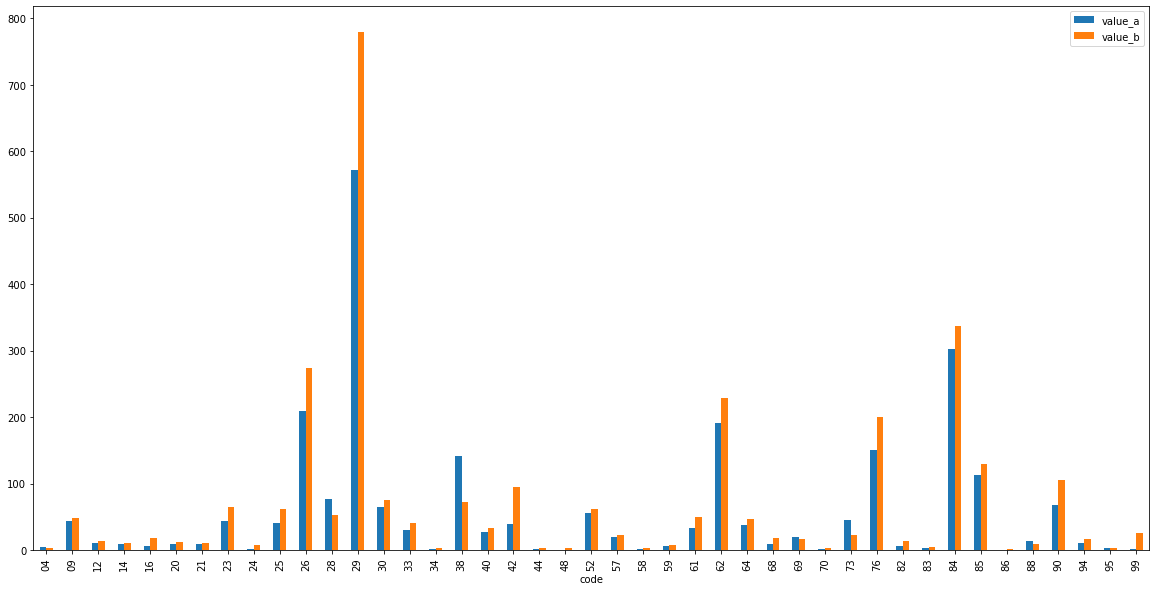

In [19]:
dfi.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

# Aggregation

In [20]:
df = df6
df['CTH6'] = df['code']
df['CTH4'] = df['code'].str.slice(0,4)
df['CTH2'] = df['code'].str.slice(0,2)
dfa = df.groupby('CTH2').filter(lambda group: len(group) > 1)
dfa.groupby(['CTH2', 'CTH4', 'CTH6']).sum()

quantity_a  value_a  quantity_b  value_b  value_diff  \
CTH2 CTH4 CTH6                                                           
03   0301 030111         414     0.02        1254     0.17       -0.15   
          030119        4899     0.14           0     0.00        0.14   
     0302 030219         820     0.00           0     0.00        0.00   
          030232        3730     0.02        5605     0.04       -0.02   
          030239         595     0.00           0     0.00        0.00   
          030289          31     0.00           0     0.00        0.00   
     0303 030326       14500     0.04           0     0.00        0.04   
          030342       40346     0.23           0     0.00        0.23   
          030343           1     0.00           0     0.00        0.00   
          030389         100     0.00       27080     0.11       -0.11   
          030399           0     0.00       14500     0.04       -0.04   
     0304 030449        1210     0.01           0     0.00        0.01   
          030459        9000     0.07           0     0.00        0.07   
          030487           0     0.00       40330     0.24       -0.24   
          030489       20960     0.15       49052     0.62       -0.47   
          030497       27080     0.10           0     0.00        0.10   
          030499    37799150    76.56    39604120    86.13       -9.57   
     0305 030510       11880     0.05           0     0.00        0.05   
     0306 030611       11100     0.19       67770     1.15       -0.96   
          030612        6510     0.11           0     0.00        0.11   
          030616       15084     0.13           0     0.00        0.13   
          030617    39687782   333.13    38094200   322.93       10.20   
          030636          40     0.00           0     0.00        0.00   
          030695           5     0.00           0     0.00        0.00   
     0307 030739      465200     1.16           0     0.00        1.16   
          030743      645344     4.88     1514378    14.96      -10.08   
          030749      141728     0.82           0     0.00        0.82   
          030752      194496     0.90      277166     1.36       -0.46   
          030759       63000     0.31           0     0.00        0.31   
          030779       23160     0.03           0     0.00        0.03   
          030792           0     0.00      487320     1.23       -1.23   
04   0405 040510        1000     0.01         500     0.00        0.01   
          040590       25458     0.18       13942     0.11        0.07   
     0406 040610           0     0.00       45940     0.22       -0.22   
          040690       38250     0.23         552     0.01        0.22   
     0408 040811      749275     3.87      497500     2.69        1.18   
          040819          33     0.00           0     0.00        0.00   
          040891       82478     0.52       80750     0.47        0.05   
     0409 040900       85795     0.34       66467     0.33        0.01   
05   0502 050210         230     0.02         430     0.03       -0.01   
     0505 050590          10     0.00           0     0.00        0.00   
     0506 050610     2833018     7.73     2631000     7.44        0.29   
          050690           0     0.00       40020     0.02       -0.02   
     0507 050790      498151     0.66      496115     0.64        0.02   
     0508 050800        9143     0.05        6218     0.05        0.00   
     0511 051191       24000     0.04       24000     0.04        0.00   
          051199           0     0.00       13510     0.17       -0.17   
06   0601 060110       19017     0.17           0     0.21       -0.04   
          060120       10000     0.04           0     0.00        0.04   
     0602 060220       41000     0.18           0     0.00        0.18   
          060290       19957     0.78       14172     1.33       -0.55   
     0603 060311      150711     0.42      178828     1.07       -0.65   
          060319      